In [34]:
from src.preprocess.text import TextDataProcessor, Corpus
from src.models.lda import LDAModel
import pandas as pd
import re


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [40]:
# %%
df_text = pd.read_csv(
    "/Users/Mikhail_Bulgakov/GitRepo/topic-modeling/data/clean_text_title_preprocessed_lemma_.csv"
)


In [41]:
df_text.head(2)

,Unnamed: 0,clean_text_title_array_norm
0,41971,открытый урок асинхронный программирование jav...
1,32826,ученый готовить фундаментальный обновление еди...


In [42]:
extra_stop_words= [
        "который",
        "такой",
        "один",
        "первый",
        "иметь",
        "часть",
        "являться",
        "один",
        "два",
        "также",
        "несколько",
        "большой",
        "данный",
        "новый",
        "это",
        "мочь",
        "нужно",
        "наш",
        "просто",
        "быть",
        "мы",
        "например",
        "свой",
        "очень",
        "все",
        "самый",
        "новый",
        "другой",
        "тот",
        "каждый"
    ]

In [43]:
def is_latin_character_in_word(word):
    return len(re.findall(r"[\x00-\x7f]", word)) > 0

def is_non_latin_character_in_word(word):
    return len(re.findall(r"[^\x00-\x7f]", word)) > 0

def is_mixed_characters_in_word(word):
    return (len(re.findall(r"[^\x00-\x7f]", word)) > 0) and (len(re.findall(r"[\x00-\x7f]", word)) > 0)

def leave_russian(string):
    return [word for word in string.split(" ") if (not is_latin_character_in_word(word) and not is_mixed_characters_in_word(word) and len(word) > 1 and not word in extra_stop_words)]

def leave_non_russian(string):
    return [word for word in string.split(" ") if (is_latin_character_in_word(word) and not is_mixed_characters_in_word(word) and len(word) > 1)]

In [44]:
df_text["only_rus"] = df_text["clean_text_title_array_norm"].apply(leave_russian)

In [45]:
df_text

,Unnamed: 0,clean_text_title_array_norm,only_rus
0,41971,открытый урок асинхронный программирование jav...,"[открытый, урок, асинхронный, программирование..."
1,32826,ученый готовить фундаментальный обновление еди...,"[ученый, готовить, фундаментальный, обновление..."
2,33122,qameetup superjob июнь проводить qameetup supe...,"[июнь, проводить, рассказывать, былоалексей, з..."
3,3216,бесплатный онлайн школа android телефон tmobil...,"[бесплатный, онлайн, школа, телефон, представл..."
4,18654,выигрывать конкурс репост вконтактемень захоте...,"[выигрывать, конкурс, репост, вконтактемень, з..."
...,...,...,...
43855,16304,sony magic link первый устройство ос magic сар...,"[устройство, ос, саристория, операционный, сис..."
43856,79,один экссотрудница отсуживать forbes млн рубль...,"[экссотрудница, отсуживать, млн, рубль, незако..."
43857,12119,создание блог symfony lts привет хабр хотеть н...,"[создание, блог, привет, хабр, хотеть, немного..."
43858,14147,security week прямой эфир facetimeглавным собы...,"[прямой, эфир, событие, прошлый, неделя, стано..."


In [46]:
ldamodel = LDAModel(framework="gensim", bigrams=True)

In [47]:
ldamodel.make_corpus(data_words=df_text["only_rus"].to_list())

100%|██████████| 8/8 [3:56:13<00:00, 1771.73s/it]  


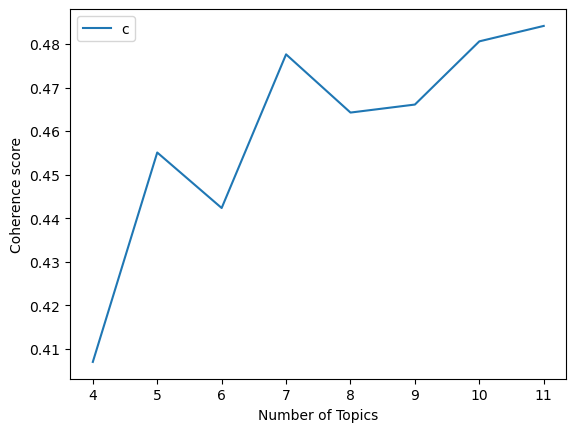

In [48]:
start, stop, step = 4, 12, 1
ldamodel.plot_coherence_graph(start=start,stop=stop,step=step)


In [49]:
num_of_topics = 7
num_of_words = 30

ldamodel.init_model(num_topics=num_of_topics)

lda_df = pd.DataFrame(ldamodel.return_model_params(num_of_topics, num_of_words))

In [50]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

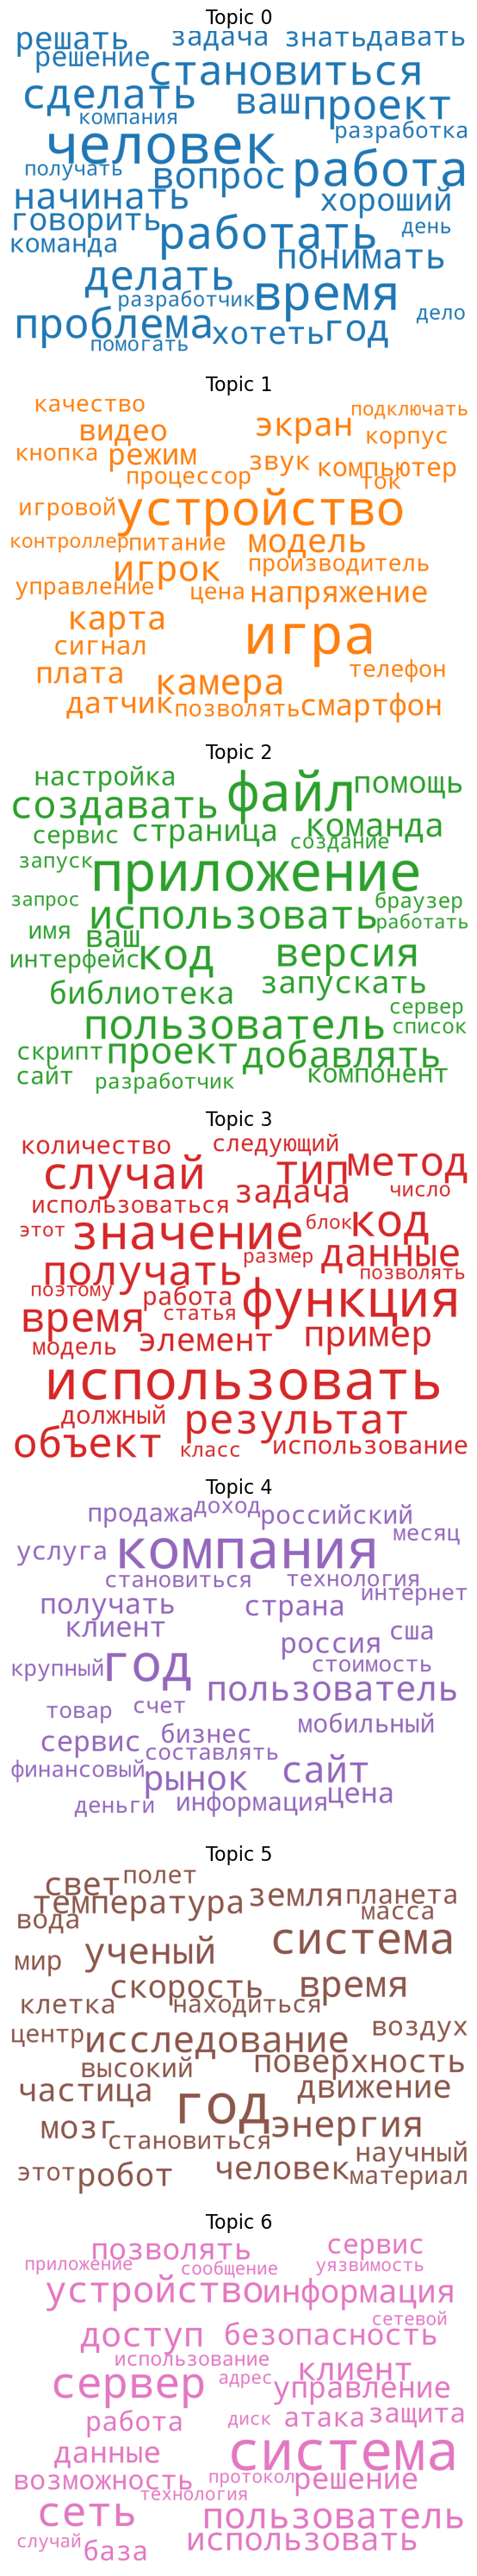

In [51]:
fig, axes = plt.subplots(num_of_topics, 1, figsize=(50,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = {i:abs(k) if abs(k)>0 else 0.0001 for i,k in zip(lda_df.iloc[i,1], lda_df.iloc[i,0])}
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [52]:
models, coherence_values = ldamodel.compute_coherence_values(stop=8, start=7, step=1, coherence="c_v")

100%|██████████| 1/1 [27:51<00:00, 1671.32s/it]


In [53]:
models, coherence_values_umass = ldamodel.compute_coherence_values(stop=8, start=7, step=1, coherence="u_mass")

100%|██████████| 1/1 [26:06<00:00, 1566.85s/it]


In [54]:
print("c_v:::", coherence_values[0])
print("u_mass", coherence_values_umass[0])

c_v::: 0.4776257720904053
u_mass -1.1952574616253364


In [56]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [57]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(ldamodel.model, ldamodel.corpus, ldamodel.id2word)

/Users/Mikhail_Bulgakov/opt/anaconda3/envs/nlp-course/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/Mikhail_Bulgakov/opt/anaconda3/envs/nlp-course/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/Mikhail_Bulgakov/opt/anaconda3/envs/nlp-course/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/Mikhail_Bulgakov/opt/anaconda3/envs/nlp-course/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the mo

In [58]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002912  0.010112       1        1  33.682002
3      0.069361  0.062324       2        1  27.052250
2      0.279579  0.037362       3        1   8.204849
6      0.091970 -0.086957       4        1   8.158547
4     -0.079082 -0.249559       5        1   8.076571
5     -0.245156  0.005216       6        1   7.700995
1     -0.113762  0.221502       7        1   7.124786, topic_info=            Term           Freq          Total Category  logprob  loglift
785     компания   86271.000000   86271.000000  Default  30.0000  30.0000
131          год  112456.000000  112456.000000  Default  29.0000  29.0000
590      система  110580.000000  110580.000000  Default  28.0000  28.0000
1842        файл   56803.000000   56803.000000  Default  27.0000  27.0000
912   приложение   73502.000000   73502.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
4088        кадр    4053.197980    6295.533900   Topic7  -6.1668   2.2013
1673  управление    5730.594359   29210.892100   Topic7  -5.8204   1.0129
1697        цена    5012.170802   15902.701193   Topic7  -5.9544   1.4870
784     качество    5336.152130   40192.480058   Topic7  -5.8918   0.6224
21     позволять    5141.328277   66088.039543   Topic7  -5.9290   0.0879

[568 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
13275      4  0.999761        абонент
11362      5  0.999286  администрация
2221       2  0.388520          адрес
2221       3  0.157518          адрес
2221       4  0.431080          адрес
...      ...       ...            ...
746        3  0.007850           этот
746        4  0.055720           этот
746        5  0.029866           этот
746        6  0.075836           этот
2765       2  0.999837         ячейка

[1260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 7, 5, 6, 2])